# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [0]:
# if you are using google colab
from google.colab import files
# files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/My Drive/NeuralMachineTranslator/daily-minimum-temperatures-in-me.csv")
df.tail(10)

,Date,Temperature
3640,1990-12-22,13.2
3641,1990-12-23,13.9
3642,1990-12-24,10.0
3643,1990-12-25,12.9
3644,1990-12-26,14.6
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


### Print the data
- First 5 rows only

In [0]:
df.head(5)

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1981-01-01
1      1981-01-02
2      1981-01-03
3      1981-01-04
4      1981-01-05
          ...    
3645   1990-12-27
3646   1990-12-28
3647   1990-12-29
3648   1990-12-30
3649   1990-12-31
Name: Date, Length: 3650, dtype: datetime64[ns]

### Set index column
- Set the DataFrame index using "Date" column

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

## Question 2

### Check the total count of null values in the data

In [0]:
df.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [0]:
df = df.dropna(how = 'any')

## Question 3

### Describe your dataframe
- use describe() method

In [0]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

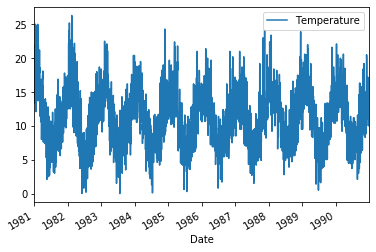

In [0]:
df.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3851ceaa58>]],
      dtype=object)

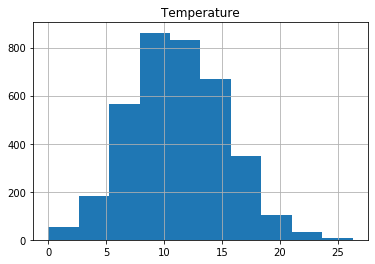

In [0]:
df.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [0]:
df.min()

Temperature    0.0
dtype: float64

In [0]:
df.max()

Temperature    26.3
dtype: float64

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [0]:
df = df.reset_index(drop = True)
train = df[:int(len(df) * 0.75)]
test = df[int(len(df) * 0.75):]

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Print scaled train and test data
- print only first 5 values

In [0]:
scaled_train[:5]


array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [0]:
scaled_test[:5]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [0]:
look_back = 1
X_train, y_train = create_seq_data(scaled_train, look_back)
X_test, y_test = create_seq_data(scaled_test, look_back)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Print shape of data
- print shape of X_train and X_test

In [0]:
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [0]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')

### summarize your model
- use summary() method

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_2 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [0]:
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





 - 5s - loss: 0.0213
Epoch 2/50
 - 4s - loss: 0.0127
Epoch 3/50
 - 5s - loss: 0.0107
Epoch 4/50
 - 4s - loss: 0.0107
Epoch 5/50
 - 4s - loss: 0.0103
Epoch 6/50
 - 4s - loss: 0.0106
Epoch 7/50
 - 4s - loss: 0.0104
Epoch 8/50
 - 4s - loss: 0.0103
Epoch 9/50
 - 4s - loss: 0.0101
Epoch 10/50
 - 4s - loss: 0.0102
Epoch 11/50
 - 4s - loss: 0.0101
Epoch 12/50
 - 4s - loss: 0.0103
Epoch 13/50
 - 4s - loss: 0.0102
Epoch 14/50
 - 4s - loss: 0.0102
Epoch 15/50
 - 4s - loss: 0.0101
Epoch 16/50
 - 4s - loss: 0.0100
Epoch 17/50
 - 4s - loss: 0.0101
Epoch 18/50
 - 4s - loss: 0.0102
Epoch 19/50
 - 4s - loss: 0.0101
Epoch 20/50
 - 4s - loss: 0.0101
Epoch 21/50
 - 4s - loss: 0.0100
Epoch 22/50
 - 4s - loss: 0.0100
Epoch 23/50
 - 4s - loss: 0.0100
Epoch 24/50
 - 4s - loss: 0.0100
Epoch 25/50
 - 4s - loss: 0.0100
Epoch 26/50
 - 4s - loss: 0.0100
Epoch 27/50
 - 4s - loss: 0.0100
Epoch 28/50
 - 4

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
trainPredict = model.predict(X_train, batch_size=1)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
testPredict = model.predict(X_test, batch_size=1)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [0]:
import math
from sklearn.metrics import mean_squared_error

In [0]:
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 2.60 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [0]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))


In [0]:
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 2.53 RMSE
